# Convolutions

[link](https://ut.philkr.net/deeplearning/convolution/convolutions/)

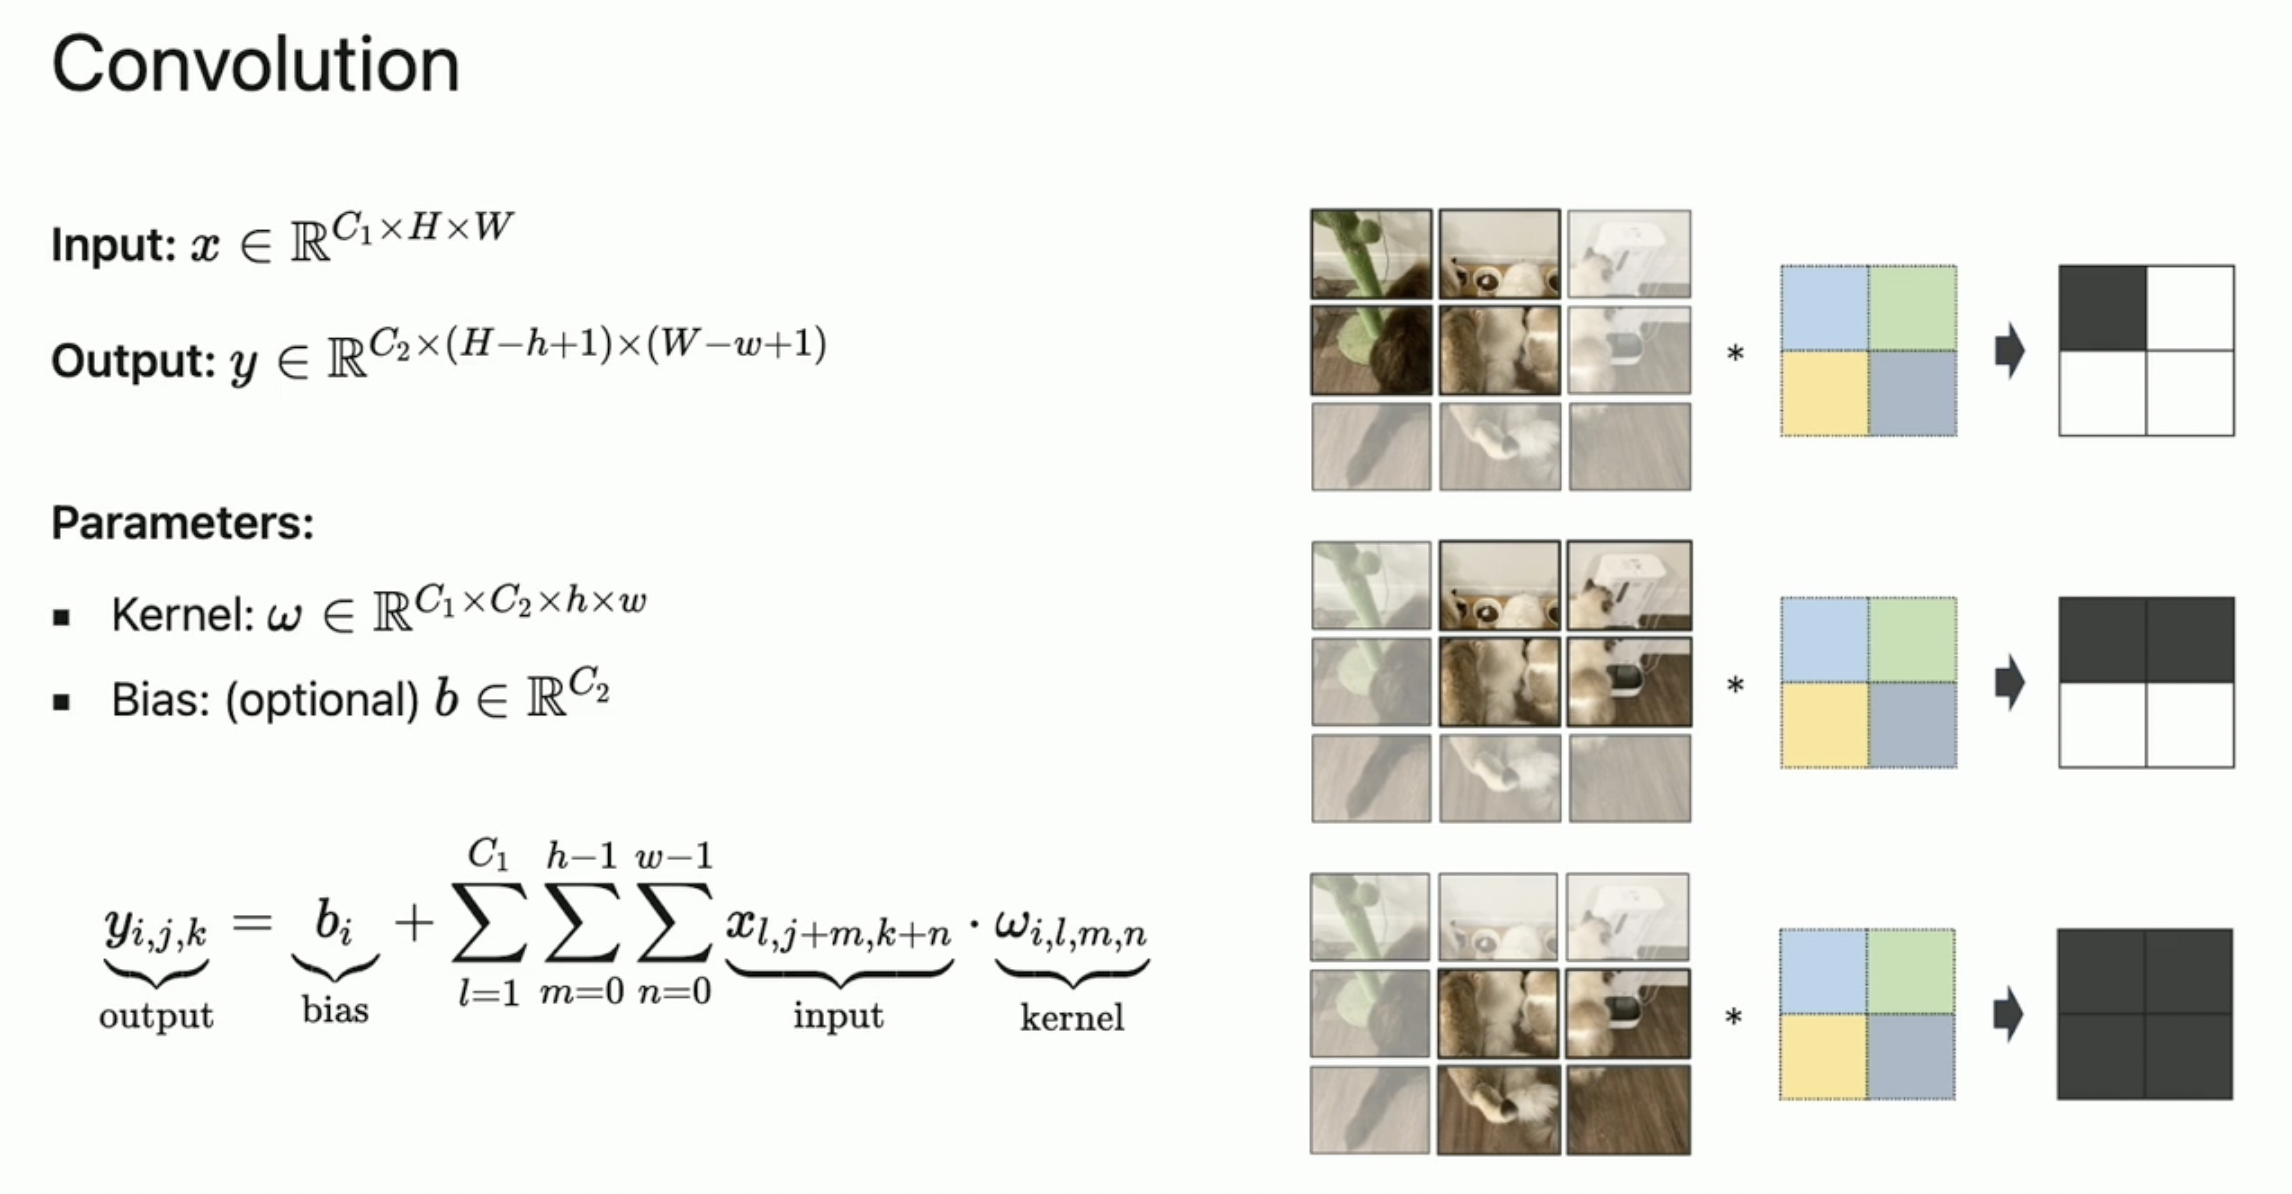

## Formulation
Given $\omega \in  \mathbb{R}^{C_1\times C_2 \times h \times w}$ and $b\in \mathcal{R}^{C_2}$, we define the convolution function as
$$
\begin{align*}
\text{conv}_{\omega,b}: \mathbb{R}^{C_1\times H \times W}& \longrightarrow \mathbb{R}^{C_2 \times (H-h+1) \times (W-w+1)}\\
\text{conv}_{\omega,b}(x)& = y 
\end{align*}

\quad where \quad

y_{i,j,k}=\underbrace{b_{i,j,k}}_{bias}+\sum_{l=1}^{C_1}\sum_{m=0}^{h-1}\sum_{n=0}^{w-1}\underbrace{x_{l,j+m,k+n}}_{input}\cdot \underbrace{\omega_{i,l,m,n}}_{kernel}

$$

Here $l,m,n$ runes over the input channel, height and width, and $i,j,k$ runs over the output channel height and width. $(h,w)$ denotes the kernel height ad width.

Notice that convolution is a linear transformation. Let's flatten the dimensions $d_x=C_1\times H\times W$  and $d_y=C_2\times (H-h+1) \times (W-w+1)$. Then we have

$$
\begin{align*}
\text{conv}: \mathbb{R}^{d_x}& \longrightarrow \mathbb{R}^{d_y}\\
\text{conv}(x)& = \mathcal{W} x + b
\end{align*}
\quad where \quad
\mathcal{W} :=\begin{pmatrix}
\mathcal{W}_{1,1}\\
\mathcal{W}_{1,2}\\
\vdots\\
\mathcal{W}_{H-h+1,W-w+1}
\end{pmatrix}_{d_y\times d_x}, 
\quad and \quad
b:=\begin{pmatrix}
b_{1,1}\\
b_{1,2}\\
\vdots\\
b_{H-h+1,W-w+1}
\end{pmatrix}_{d_y}, 
$$

where for $(j,k)\in\mathbb{Z}^{H-h+1}\times\mathbb{Z}^{W-w+1}$ the matrix $\mathcal{W}_{j,k}$ and the vector $b_{j,k}$ defines the  $(j,k)$-th convolution output as follow

$$
\begin{align*}
\text{conv}_{j,k}: \mathbb{R}^{d_x}& \longrightarrow \mathbb{R}^{C_2}\\
\text{conv}_{j,k}(x)& = \mathcal{W}_{j,k} x+ b_{j,k}
\end{align*}

\quad where \quad

\mathcal{W}_{j,k}:=\begin{pmatrix}
\mathcal{W}_{j,k,1}|\mathcal{W}_{j,k,2}|\dots|\mathcal{W}_{j,k,C_1}
\end{pmatrix}_{C_2\times C_1HW}
$$

and 
$$
\begin{align*}
\mathcal{W_{j,k,l}}&:=\begin{pmatrix}
O_{C_2\times (j-1) W}|B_{l,j,k}|B_{l,j+1,k}|\dots|B_{l,j+h-1,k}|O_{C_2\times (H-h-j+1)W}
\end{pmatrix}_{C_2\times HW}\\
B_{l,j,k}&=
\begin{pmatrix}
0 \dots 0\! &\!   \omega_{1,l,j,0}\! &\! \omega_{1,l,j,1} \! &\! \dots \! &\!\omega_{1,l,j,w-1}\! &\! 0 \dots 0\\
 0 \dots 0\! &\! \omega_{2,l,j,0}\! &\! \omega_{2,l,j,1} \! &\! \dots \! &\!\omega_{2,l,j,w-1}\! &\! 0 \dots 0\\
\vdots&\vdots&\ddots & \vdots & \\
\underbrace{0 \dots 0}_{k-1}\! &\! \omega_{C_2,l,j,0}\! &\! \omega_{C_2,l,j,1} \! &\! \dots \! &\!\omega_{C_2,l,j,w-1}\! &\!\underbrace{0 \dots 0}_{W-w-k+1}\\
\end{pmatrix}_{C_2\times W}\\
x &=
\begin{pmatrix}
x_{1,1,1}\\
x_{1,1,2}\\
\vdots\\
x_{1,1,W}\\
x_{1,2,1}\\
x_{1,2,2}\\
\vdots\\
x_{C_1,H,W}\\
\end{pmatrix}
\quad
b_{j,k}=
\begin{pmatrix}
b_{1,j,k}\\
b_{2,j,k}\\
\vdots\\
x_{C_2,j,k}\\
\end{pmatrix}
\end{align*}
$$

and $O_{n\times m}$ denotes the $n\times m$ zero matrix. 

Notice that the number of parameter of $\text{conv}$ is much more smaller than a fully connected layer  
$$C_2C_1(h-1)(w-1)+C_2(H-h+1)(W-w+1)<<d_xd_y + C_2(H-h+1)(W-w+1)$$
Notice that 
$$d_xd_y =C_1HWC_2(H-h+1)(W-w+1)$$
and
$$(h-1)(w-1)<<HW(H-h+1)(W-w+1)$$
tipically $h=w=3,5,7,9$

Usually $b_{j,k}$ is taken the same across all location so the number of parameters in this case is 
$$
C_2C_1(h-1)(w-1)+C_2=C_2(C_1(h-1)(w-1)+1)
$$
which is independent of the resolution of the image (i.e $W$ and $H$). It only depends on the input and output chanels (i.e. $C_1,C_2$) and the kernel size (i.e. $h$ and $w$)

## Receptive fields

How many inputs influence an specific output

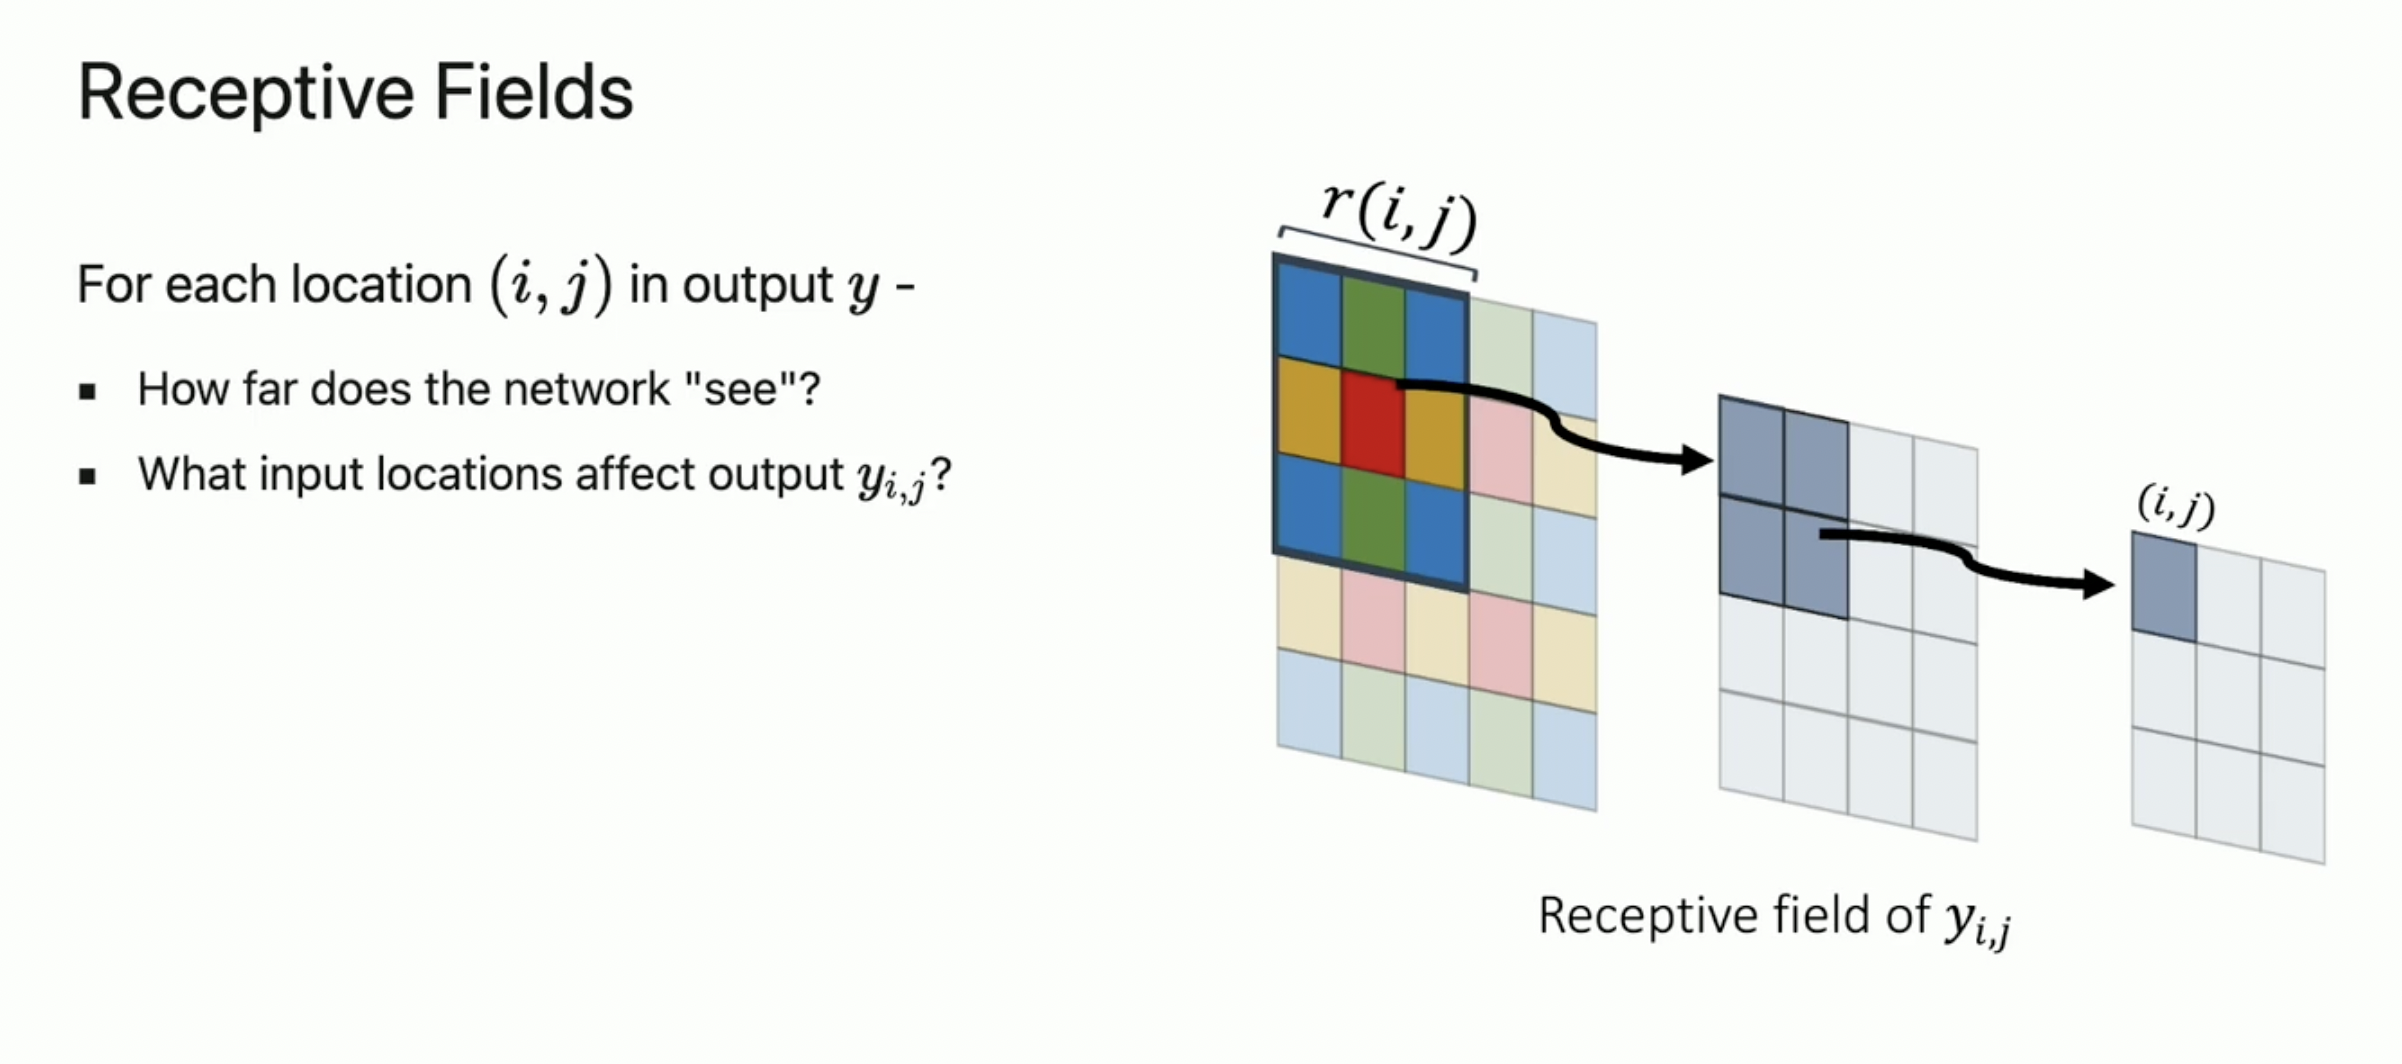

Notice that the the receptive field is compossed of the $(j,k)$ output lemente are the values of $x$ not multiplied ny $0$ inm 
the matrix multiplication
$$
\begin{align*}
\text{conv}_{j,k}: \mathbb{R}^{d_x}& \longrightarrow \mathbb{R}^{C_2}\\
\text{conv}_{j,k}(x)& = \mathcal{W}_{j,k} x+ b_{j,k}
\end{align*}
$$

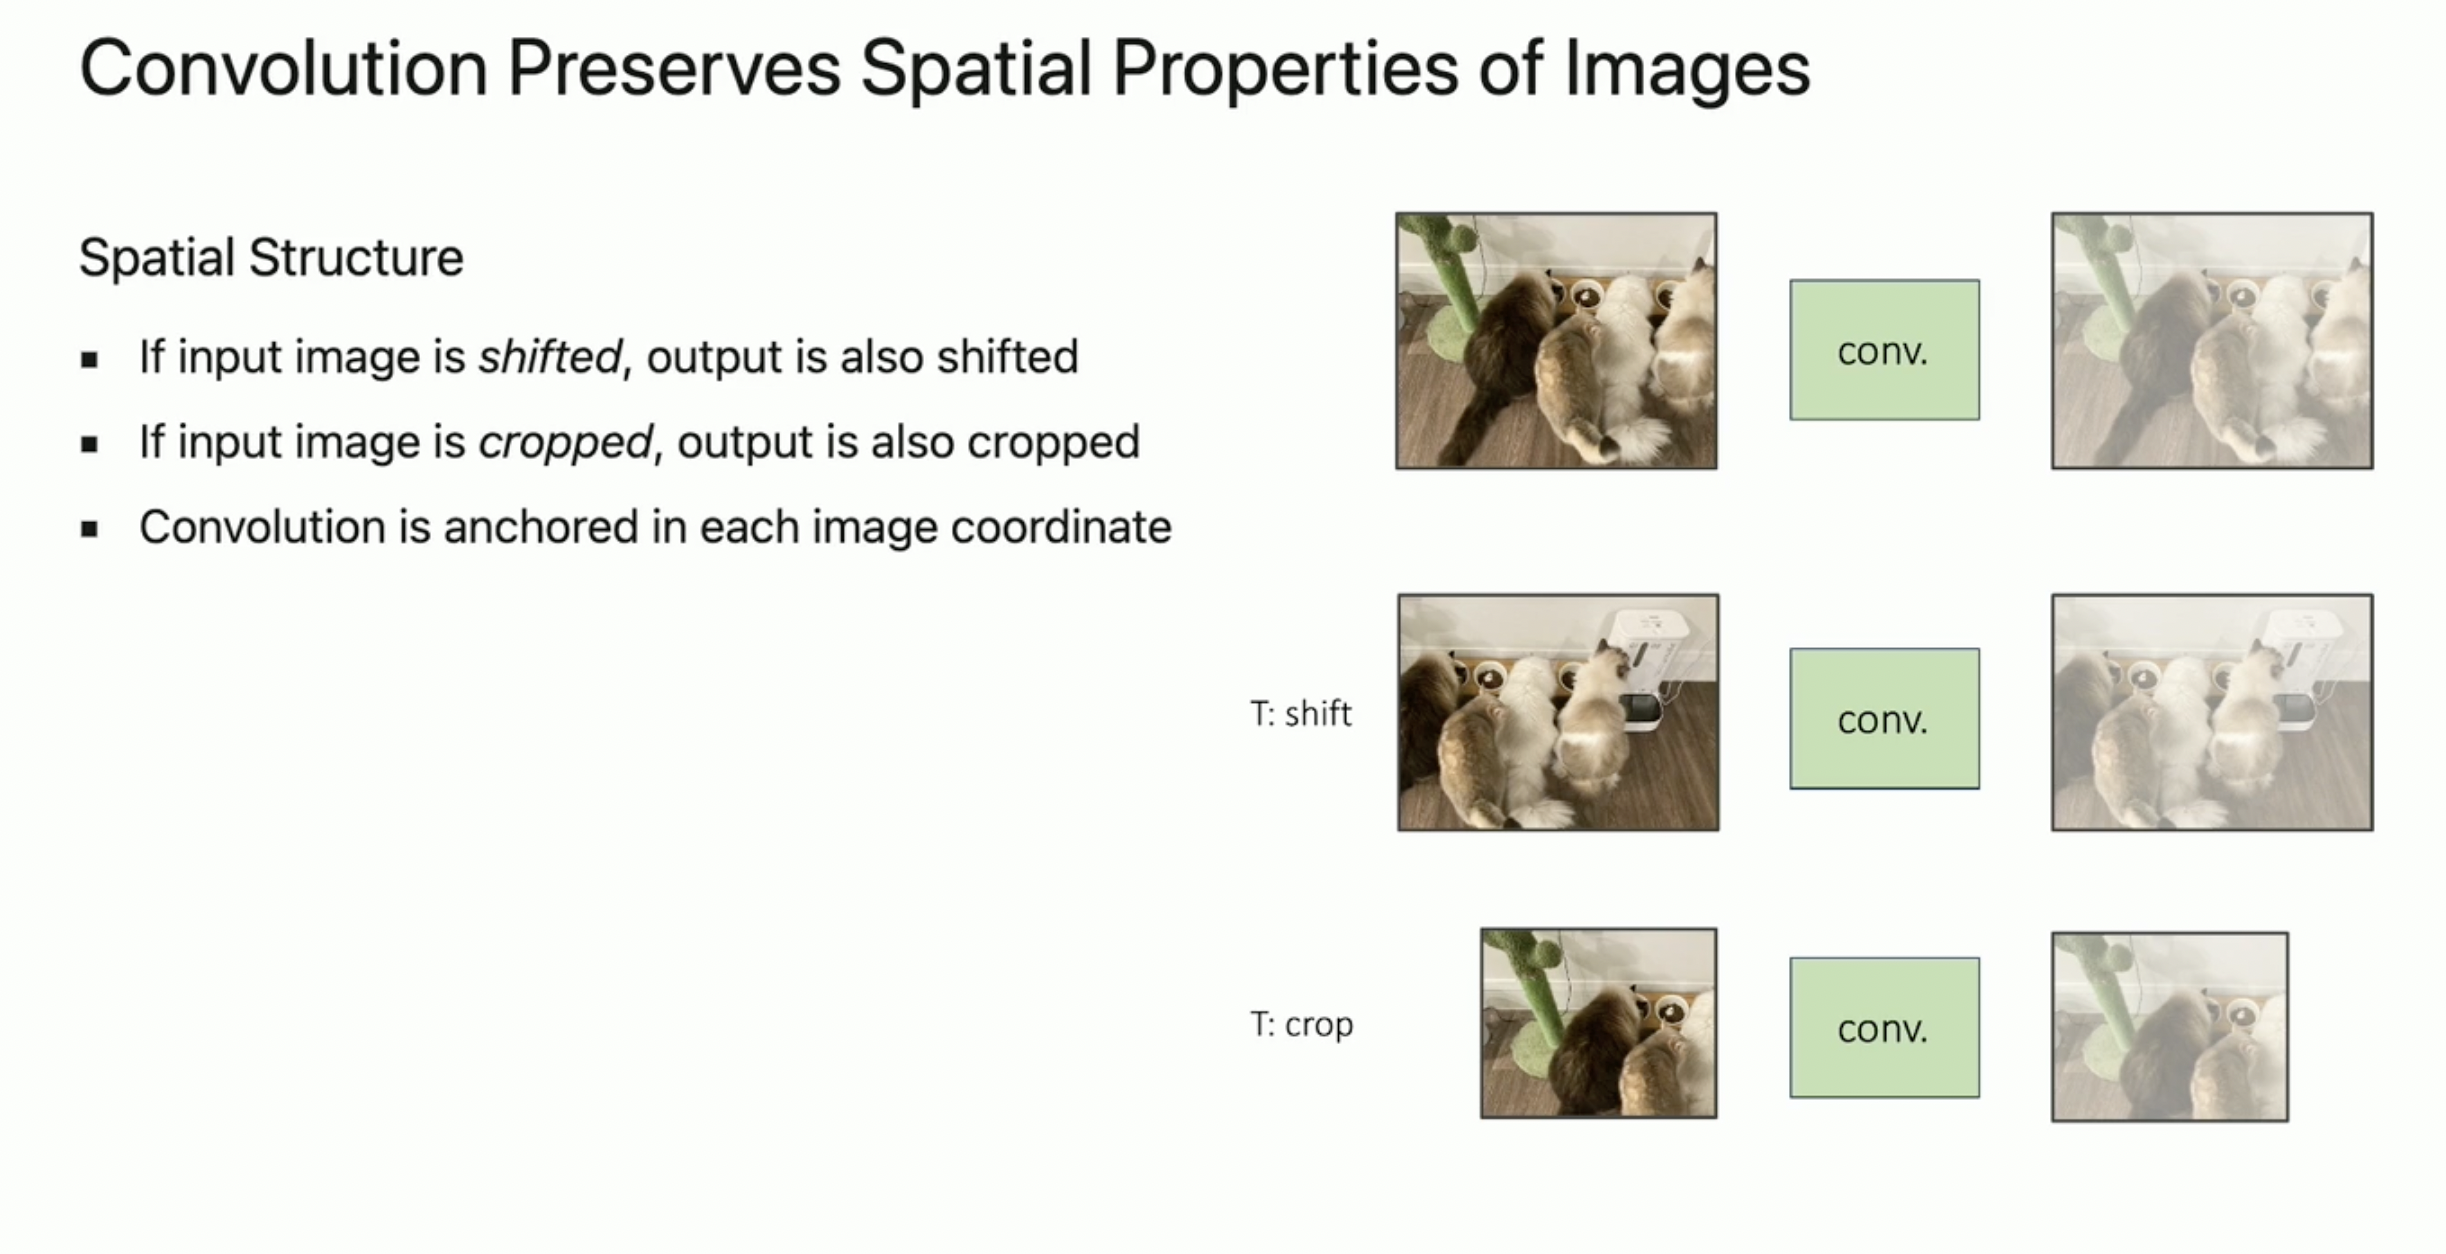

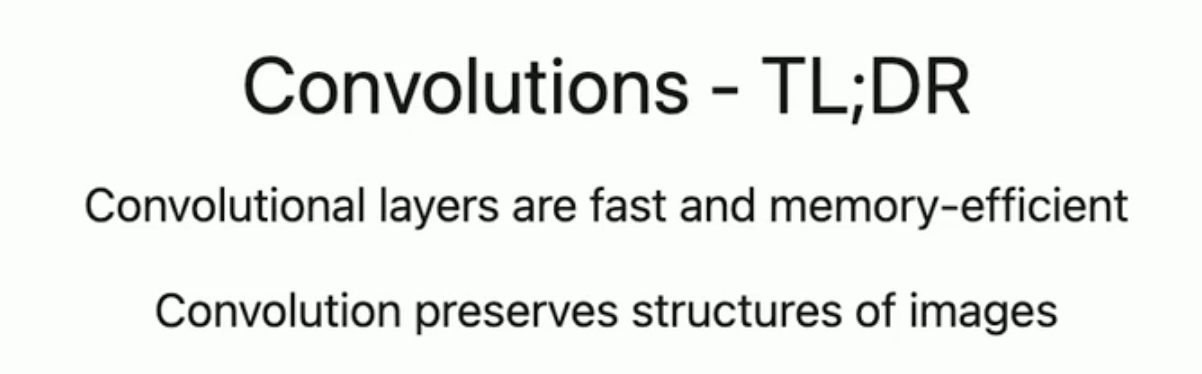